# Import Dependencies and Check GPU

In [2]:
import torch
import numpy as np
import random
import os
import shutil

from sklearn.metrics import roc_curve, roc_auc_score, auc
from task1Utils import load_dataset, get_model, train, plot_loss, evaluate, plot_multiclass_roc

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("device:", device)

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

device: cuda


# Set Seeds

In [3]:
# Set Seeds

seed = 50

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True

# Functions

In [4]:
def plot_roc(name_list, fpr_tpr_list, auc_scores_list, figsize, linewidth, fontsize):
    plt.figure(figsize=(figsize, figsize))
    color = iter(cm.Dark2(np.linspace(0, 1, len(name_list))))
    model_name_list = [x.split('-')[1] for x in name_list]
    
    for i in range(len(model_name_list)):

        model_name = model_name_list[i]
        fpr, tpr = fpr_tpr_list[i]
        c = next(color)
        plt.plot(fpr, tpr, lw=linewidth, label=model_name + ' (auc={})'.format(auc_scores_list[i]), c=c)

    plt.plot([0, 1], [0, 1], color="navy", lw=linewidth, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate", fontsize=fontsize)
    plt.ylabel("True Positive Rate", fontsize=fontsize)
    plt.title("Task 5 ROC Curve", fontsize=fontsize)
    plt.legend(loc="lower right", prop={'size':fontsize})
    plt.show()

# Define Model Names

In [5]:
name_list = [
    'task1-EfNetB2-RGB-150-LR-0.001-gamma-0.2-step-5-epochs-30',
    'task1-ResNet18-RGB-150-LR-0.001-gamma-0.2-step-5-epochs-30',
]

# Load Data

In [6]:
train_loader, test_loader, CLASSES = load_dataset(256)

# Get Predictions and ROC Statistics

In [7]:
fpr_tpr_list = []
auc_scores_list = []

for name in name_list:
    checkpoint_dir = './checkpoints_'+name
    checkpoint_path = os.path.join(checkpoint_dir, name+'-BEST.pkl')

    y_true, y_pred = evaluate(name, test_loader, checkpoint_path)

    fpr_dict = dict()
    tpr_dict = dict()
    auc_scores_dict = dict()

    for i in range(len(CLASSES)):
        label = CLASSES[i]

        fpr_dict[label], tpr_dict[label], _ = roc_curve(y_true[:,i], y_pred[:,i])
        auc_scores_dict[label] = auc(fpr_dict[label], tpr_dict[label])
    
    fpr_tpr_list.append((fpr_dict, tpr_dict))
    auc_scores_list.append(auc_scores_dict)

100%|███████████████████████████████████████████| 30/30 [00:02<00:00, 10.60it/s]


# Plot ROC

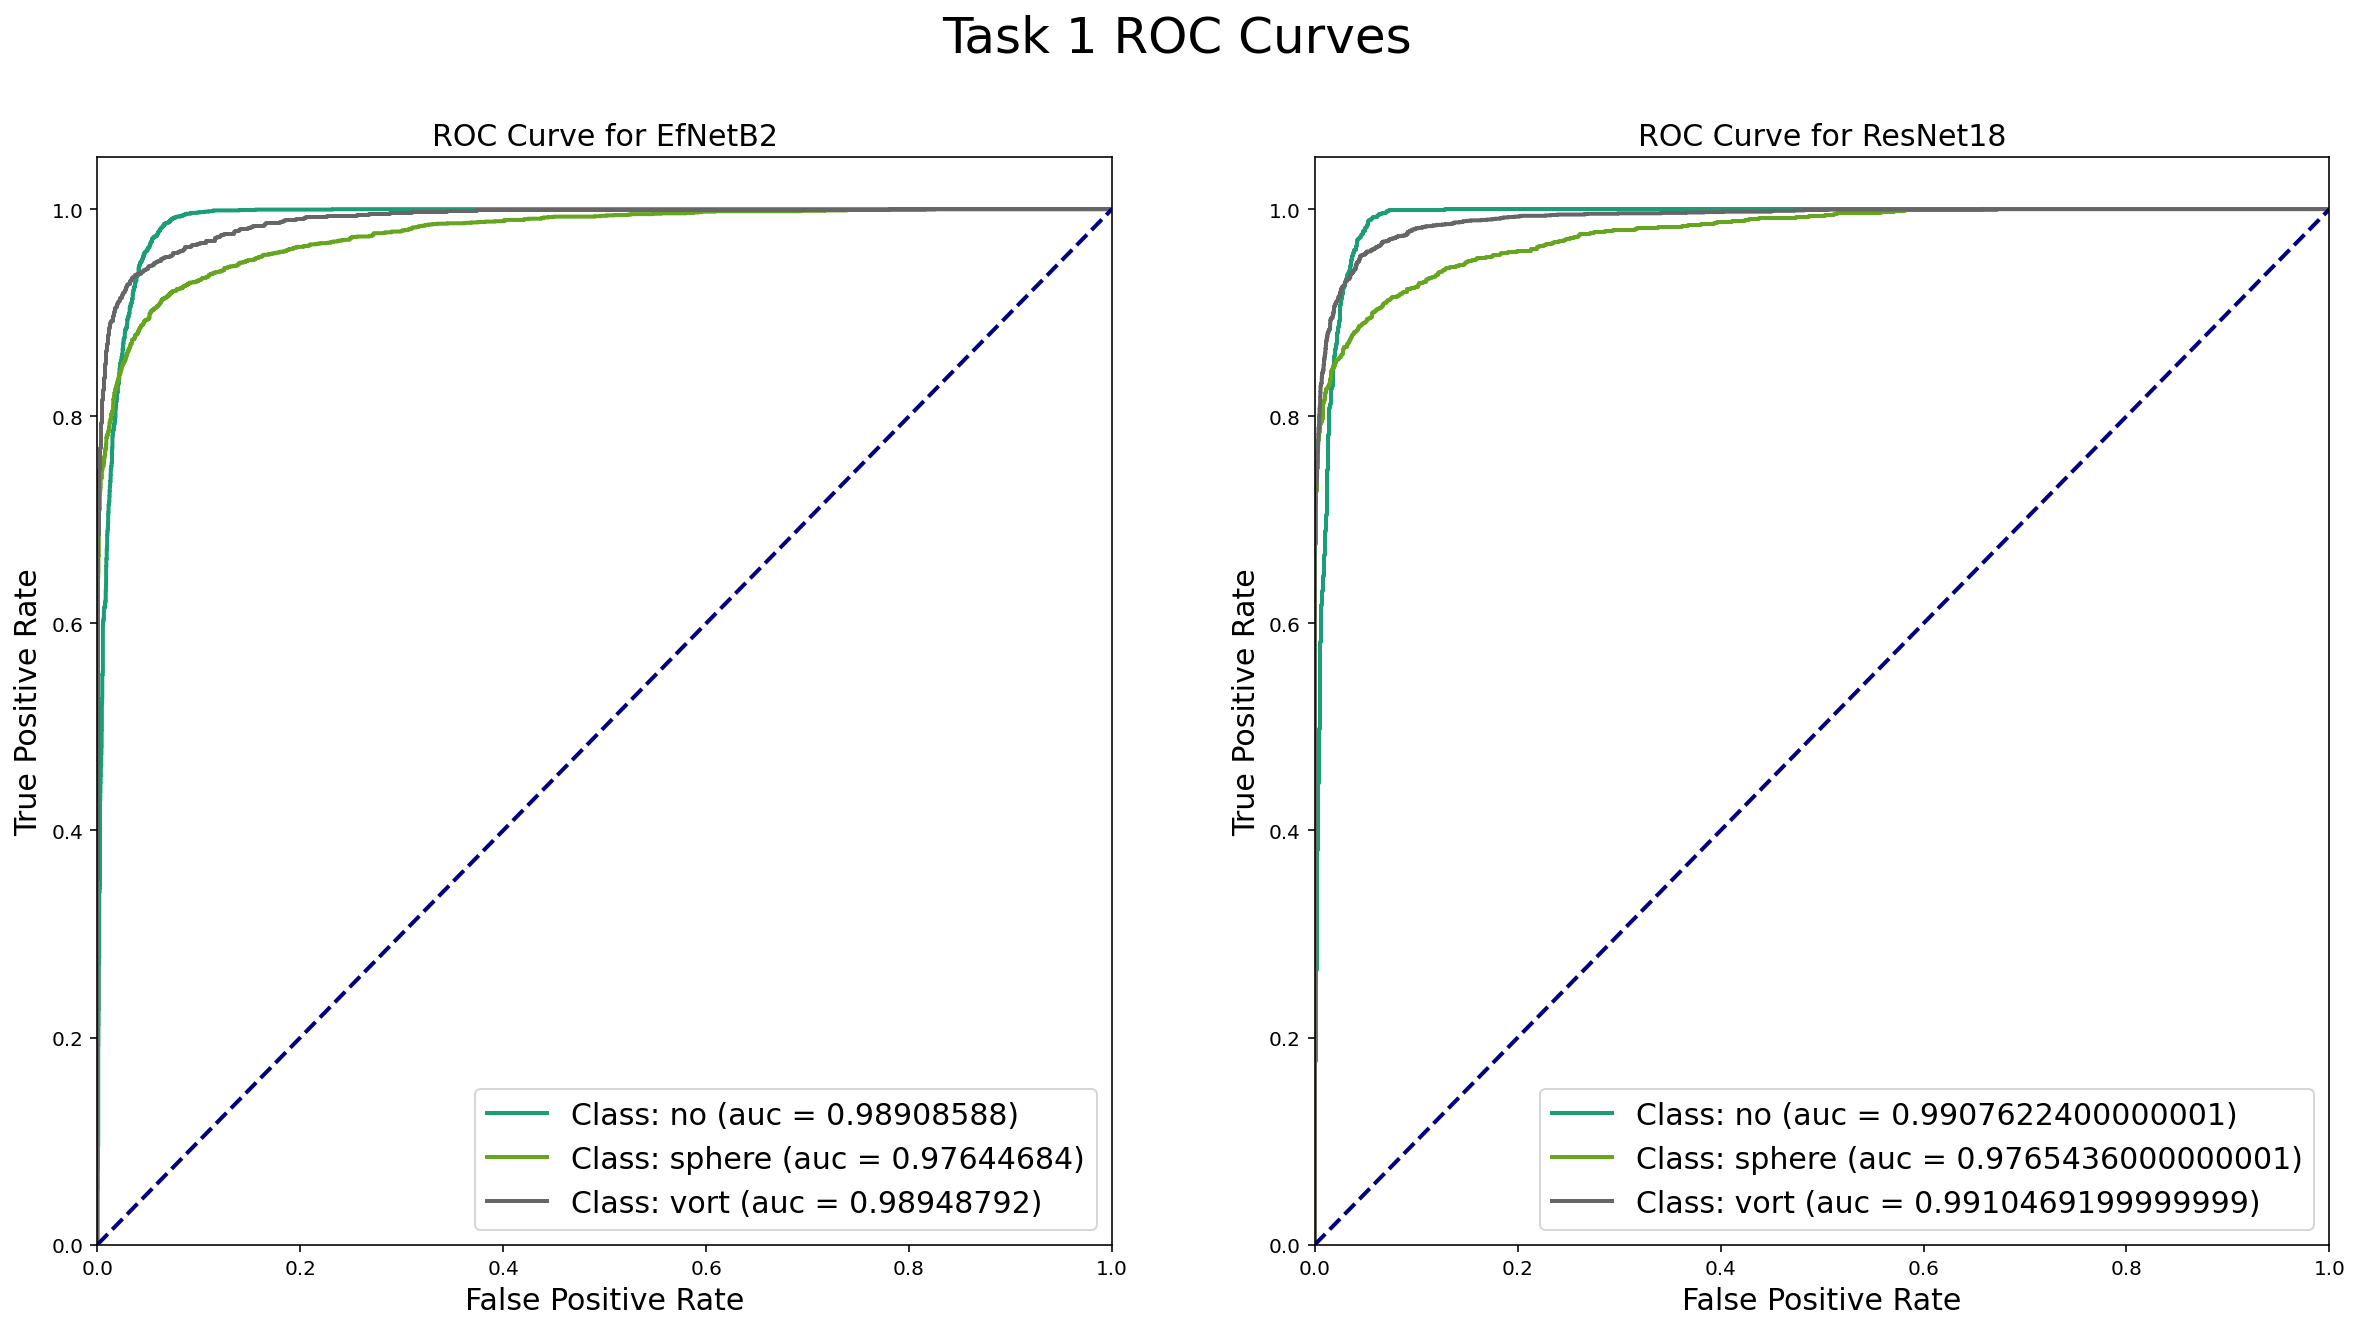

In [8]:
plot_multiclass_roc(name_list, fpr_tpr_list, auc_scores_list, figsize=10, linewidth=2, fontsize=15)